<a href="https://colab.research.google.com/github/johnjustine5646/Lab9/blob/main/Lab9_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import\
accuracy_score, precision_score, recall_score, f1_score,\
roc_curve, PrecisionRecallDisplay, classification_report
from sklearn.svm import SVC as svc
import seaborn as sb

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import cv2

path = '/content/drive/MyDrive/Training'
classes = {'no_tumor':0, 'pituitary_tumor':1}
X = []
Y = []

for cls in classes:
  pth = os.path.join(path, cls)
  for j in os.listdir(pth):
    img = cv2.imread(os.path.join(pth, j), 0)
    img = cv2.resize(img, (200, 200))
    X.append(img)
    Y.append(classes[cls])


In [ ]:
X = np.array(X)
Y = np.array(Y)

<Axes: >

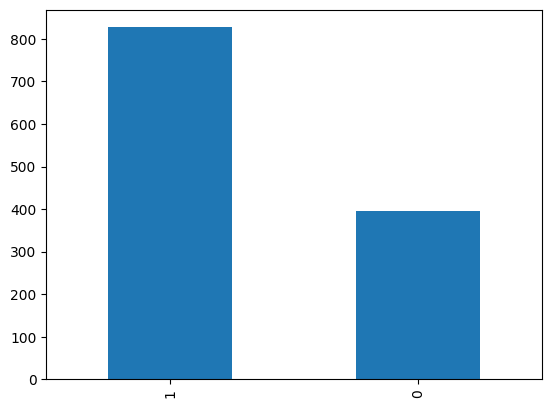

In [ ]:
#checking for class imbalance
pd.Series(Y).value_counts().plot(kind='bar') #there is class imbalance

In [ ]:
X_updated = X.reshape(len(X), -1)

In [ ]:
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

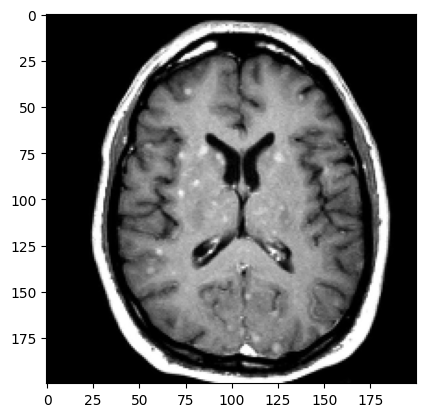

In [ ]:
plt.imshow(X[0], cmap='gray')

In [ ]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_updated, Y, random_state=10,
                                                    test_size=.20)

In [ ]:
sv = svc()
sv.fit(X_train, Y_train)


SVC()

In [ ]:
print("Training Score:", sv.score(X_train, Y_train))
print("Testing Score:", sv.score(X_test, Y_test))

Training Score: 0.9907881269191402
Testing Score: 0.9551020408163265


In [ ]:
ages = []
for i in range(1222):
  ages.append(np.random.randint(30,90))

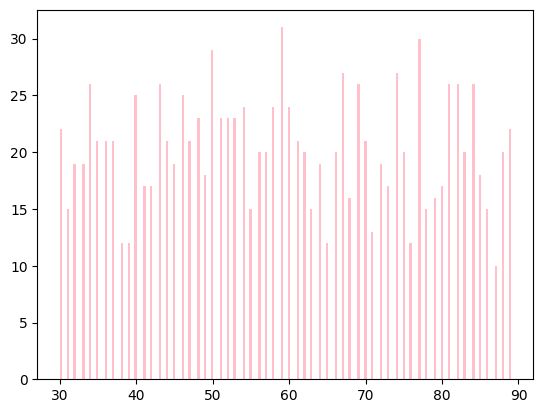

In [ ]:

plt.hist(ages, bins=200, color='pink');

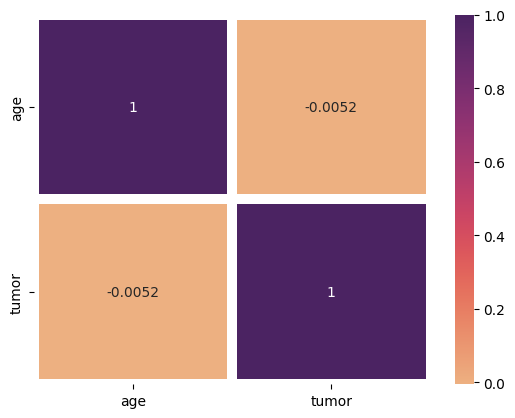

In [ ]:
sb.heatmap(np.corrcoef(ages, Y), annot=True, cmap='flare', linewidths=6,\
           xticklabels=['age', 'tumor'], yticklabels=['age', 'tumor']);


In [ ]:
y_pred = sv.predict(X_test)

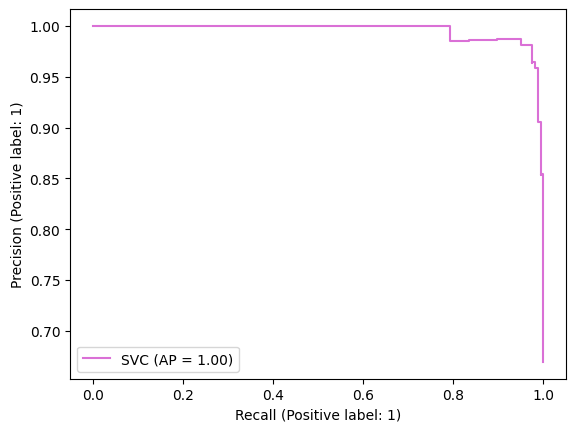

In [ ]:
PrecisionRecallDisplay.from_estimator(sv, X_test, Y_test, color='orchid');

In [ ]:
sv = svc(probability=True)

In [ ]:
y_pred.shape

(245,)

In [ ]:
fpr, tpr, thr = roc_curve(Y_test, y_pred)

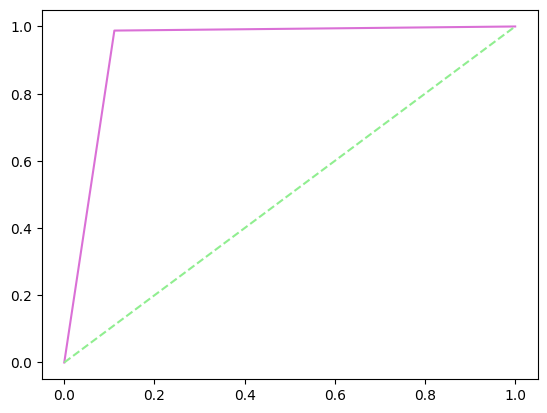

In [ ]:
plt.plot(fpr, tpr, color='orchid')
plt.plot([0, 1], ls="--", color='lightgreen');

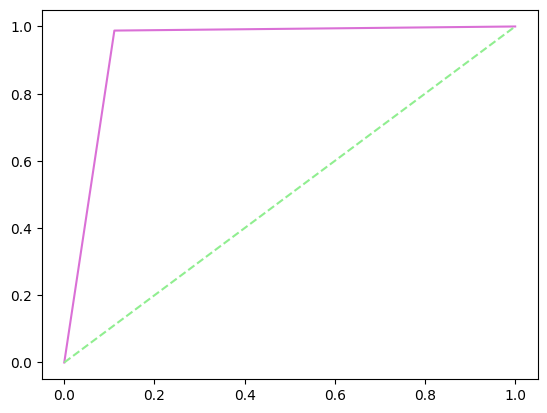

In [ ]:
plt.plot(fpr, tpr, color='orchid')
plt.plot([0, 1], ls="--", color='lightgreen');

In [23]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','poly']}
grid = GridSearchCV(svc(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.679 total time=  24.5s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.679 total time=  26.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.682 total time=  26.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.677 total time=  25.7s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.677 total time=  25.9s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.939 total time=   6.8s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.959 total time=   8.2s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.887 total time=   6.5s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.928 total time=   7.9s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.938 total time=   7.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.679 total time=  24.7s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly']},
             verbose=3)

In [24]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}
SVC(C=0.1, gamma=1, kernel='poly')


In [26]:
grid_predictions = grid.predict(X_test)
print(classification_report(Y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.98      0.79      0.88        81
           1       0.91      0.99      0.95       164

    accuracy                           0.93       245
   macro avg       0.95      0.89      0.91       245
weighted avg       0.93      0.93      0.92       245



In [27]:
dec={0:'No Tumor', 1:'Positive Tumor'}

In [30]:
plt.figure(figsize=(12,8))
c=1
path='/content/drive/MyDrive/Testing/no_tumorr'
for i in os.listdir(path)[:9]:
  img=cv2.imread(os.path.join(path,i),0)
  if img is not None:
    p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
    plt.subplot(3,3,c)
    plt.title(dec.get(p[0],'UnKnown'))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1
  else:
    print(f"Fail to load image:{i}")
    plt.show()

FileNotFoundError: ignored

<Figure size 1200x800 with 0 Axes>